### Problem Definition:

The objective is to analyze the dataset to find insights and develop strategies to improve the effectiveness of future marketing campaigns for a financial institution. Specifically, we aim to identify patterns and factors influencing whether clients subscribe to a term deposit account. By understanding these patterns, the bank can tailor its marketing strategies to target the right audience segments and enhance campaign performance.
<hr/>

**Term** **deposit**
    is a fixed deposit or time deposit, is a type of investment offered by banks and financial institutions. In a term deposit, an individual deposits a certain amount of money with the bank for a fixed period of time, known as the term or maturity period. The money is held by the bank for the specified duration, during which it earns a fixed interest rate.



### Dataset Overview:
The dataset contains information collected during the bank's marketing campaigns. It includes various features related to bank clients, their interactions with the bank, and the outcomes of previous marketing efforts. The target variable indicates whether a client has subscribed to a term deposit account.


### Description of Columns:
1. **Age**: Numeric feature representing the age of the bank client.
2. **Job**: Categorical feature indicating the type of job the client has.
3. **Marital**: Categorical feature indicating the marital status of the client.
4. **Education**: Categorical feature representing the educational level of the client.
5. **Default**: Categorical feature indicating whether the client has credit in default.
6. **Housing**: Categorical feature indicating whether the client has a housing loan.
7. **Loan**: Categorical feature indicating whether the client has a personal loan.
8. **Balance**: Numeric feature representing the balance of the individual.
9. **Contact**: Categorical feature indicating the communication type used to contact the client.
10. **Month**: Categorical feature indicating the month of the last contact.
11. **Day**: Categorical feature indicating the day of the week of the last contact.
12. **Duration**: Numeric feature representing the duration of the last contact in seconds.
13. **Campaign**: Numeric feature representing the number of contacts performed during the current campaign for this client.
14. **Pdays**: Numeric feature representing the number of days since the client was last contacted from a previous campaign.
15. **Previous**: Numeric feature representing the number of contacts performed before the current campaign for this client.
16. **Poutcome**: Categorical feature representing the outcome of the previous marketing campaign.
17. **deposite (Target)**: Binary feature indicating whether the client has subscribed to a term deposit.

### Methodology

We use models like:
- Logistic Regression.
- Random Forest.
- Convolutional Neural Networks 

Evaluated using metrics like 
- accuracy
- precision
- recall
- ROC-AUC. 
This data-driven approach enables organizations to tailor strategies for enhanced customer engagement and business growth.

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#### Data Loading and Exploration

In [3]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.shape

(11162, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [10]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6242,46,admin.,married,secondary,no,-42,no,yes,telephone,28,jul,181,12,-1,0,unknown,no
1014,30,services,married,secondary,no,3929,yes,no,cellular,20,nov,593,1,-1,0,unknown,yes
9672,34,housemaid,single,primary,no,443,no,no,cellular,30,jan,10,1,2,1,other,no
6053,47,unemployed,divorced,secondary,no,947,no,no,cellular,5,feb,124,2,-1,0,unknown,no
7132,34,blue-collar,divorced,secondary,no,1125,yes,yes,cellular,19,nov,141,2,-1,0,unknown,no


#### Missing Values

In [11]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


we see the is no missing values

# Exploratory Data Analysis (EDA)

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


people have loans counts

Text(0.5, 1.0, 'people have a loan')

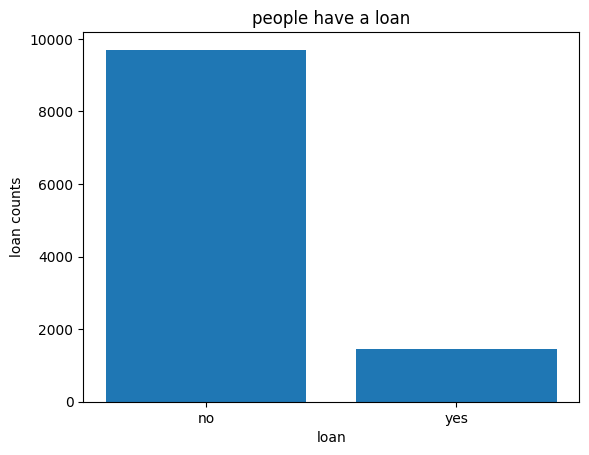

In [13]:
counts=df["loan"].value_counts()
counts
plt.bar(['no','yes'] ,counts)
# set x/y labels and plot title
plt.xlabel("loan")
plt.ylabel("loan counts")
plt.title("people have a loan")

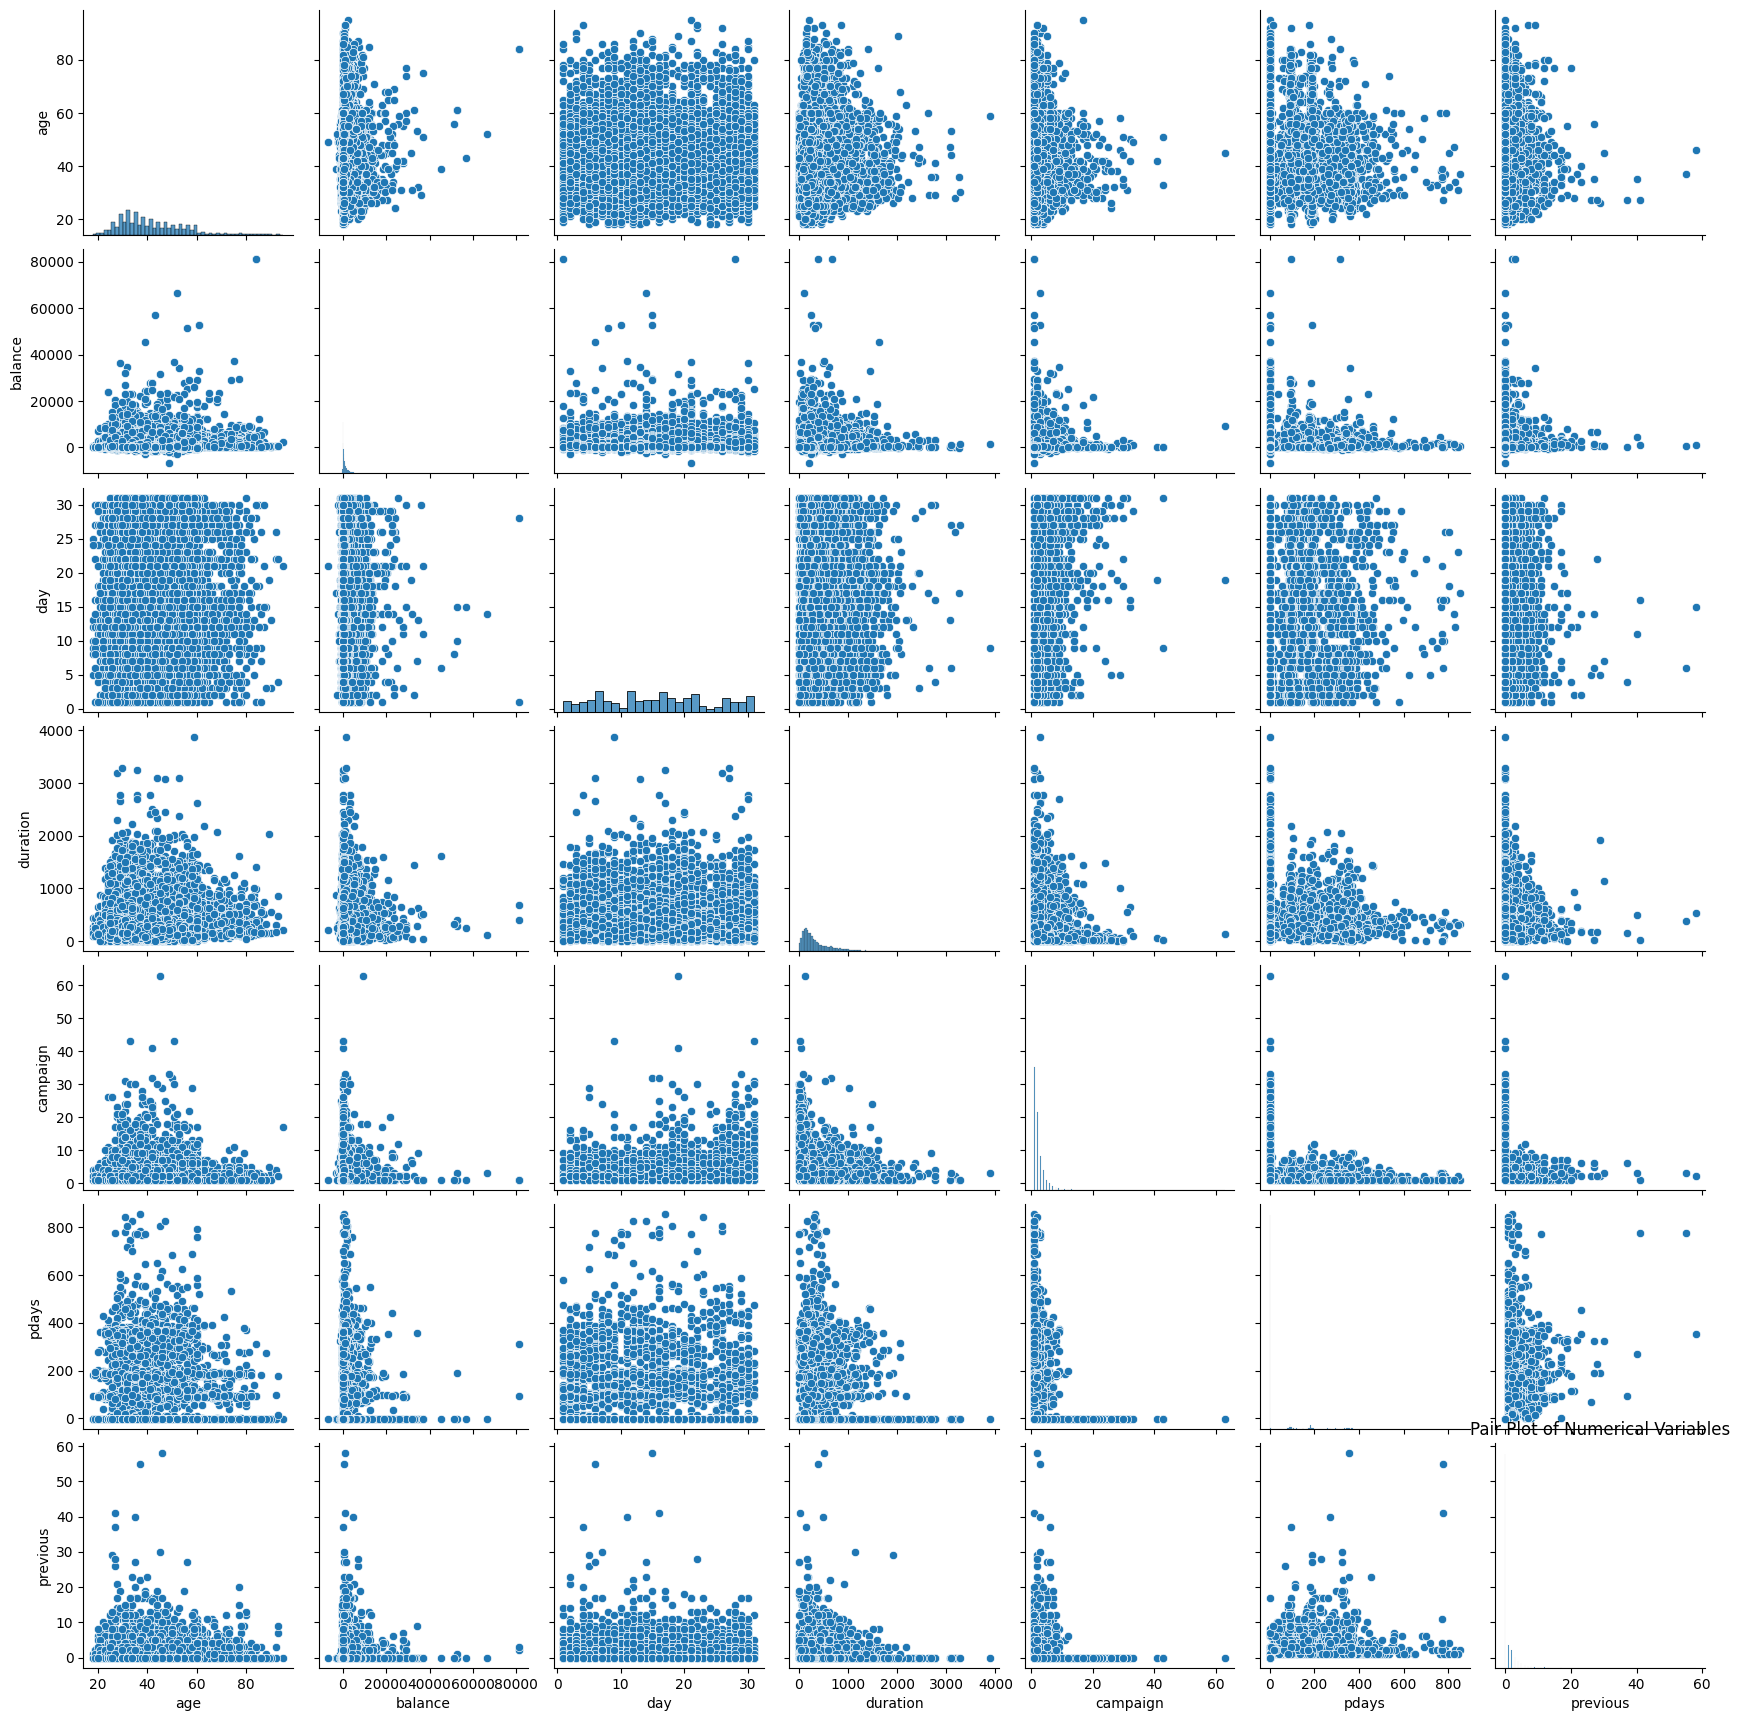

In [14]:
sns.pairplot(df[df.select_dtypes(exclude="object").columns])
plt.title('Pair Plot of Numerical Variables')
plt.show()

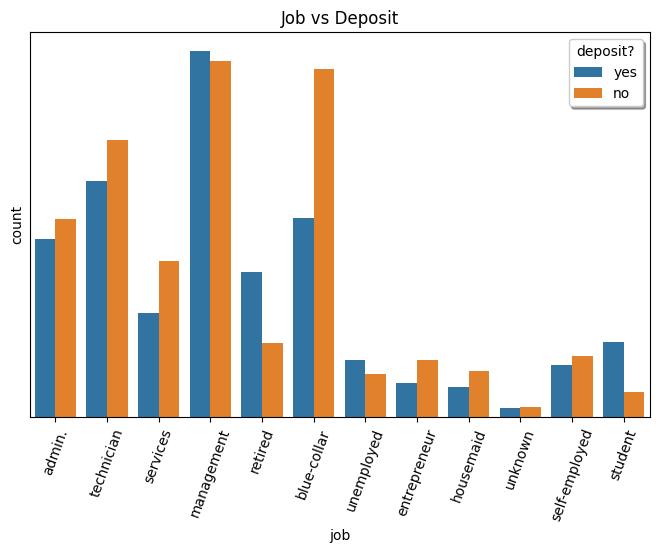

In [15]:

plt.figure(figsize=(8, 5));
plt.title('Job vs Deposit')
g = sns.countplot(x= 'job', hue = 'deposit', data=df)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()

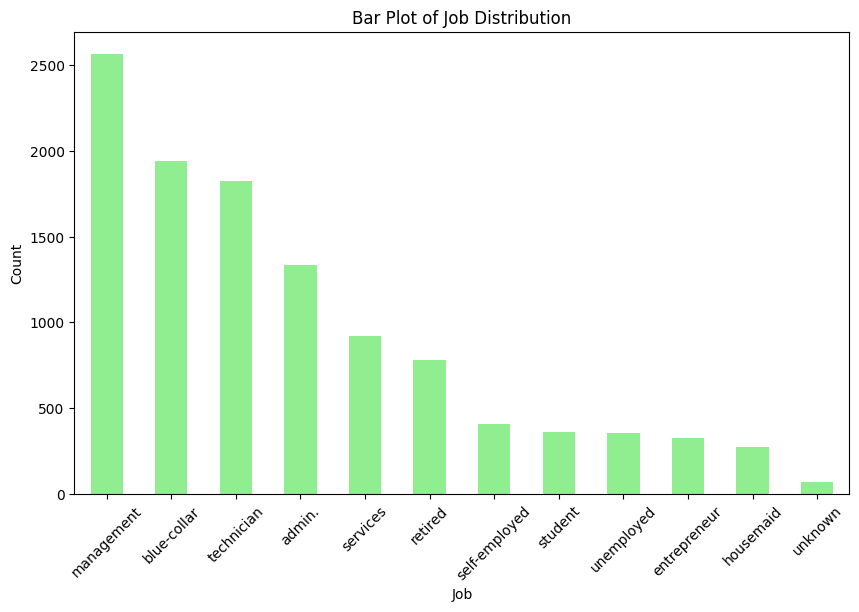

In [16]:
plt.figure(figsize=(10, 6))
job_counts = df['job'].value_counts()
job_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar Plot of Job Distribution')
plt.xticks(range(len(job_counts)), job_counts.index, rotation=45)
plt.show()

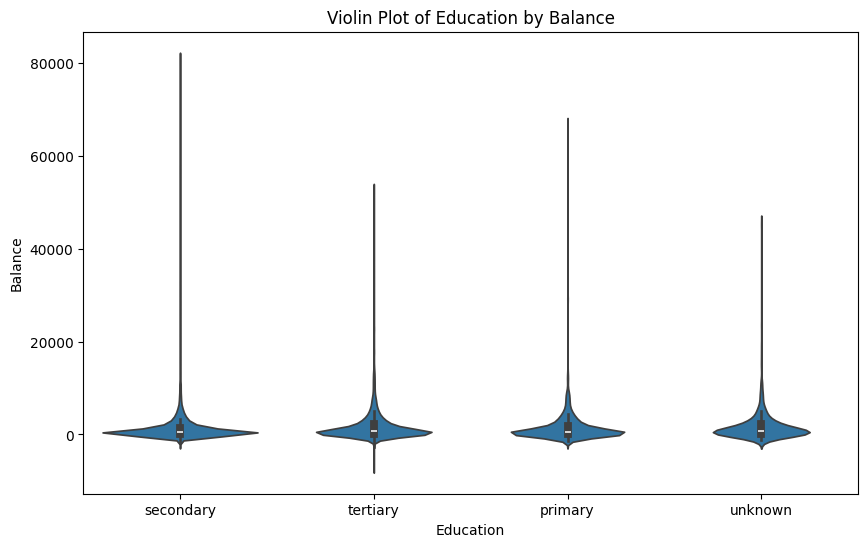

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='education', y='balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.title('Violin Plot of Education by Balance')
plt.show()

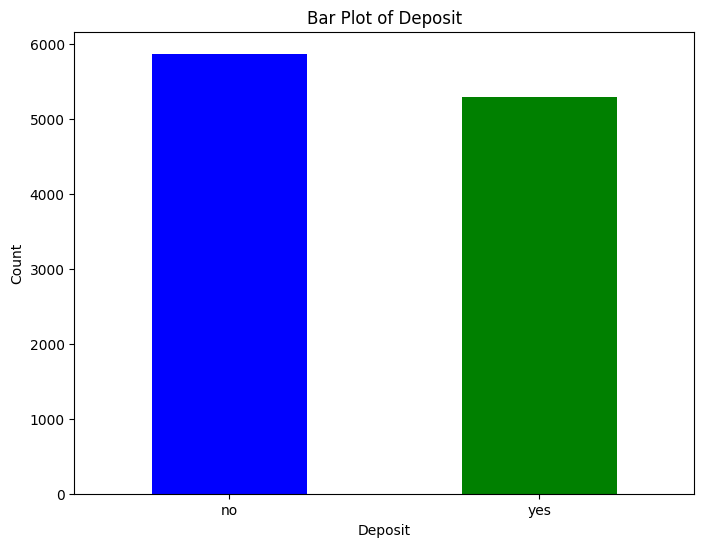

In [18]:
plt.figure(figsize=(8, 6))
df['deposit'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.title('Bar Plot of Deposit')
plt.xticks(rotation=0)
plt.show()

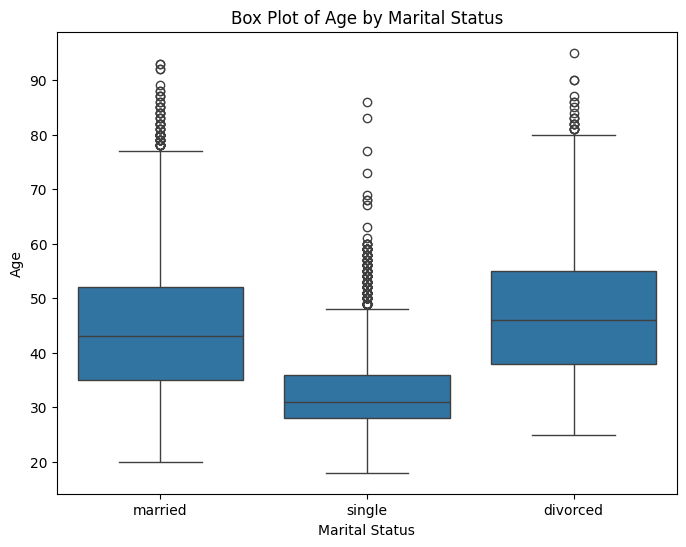

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='marital', y='age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Marital Status')
plt.show()

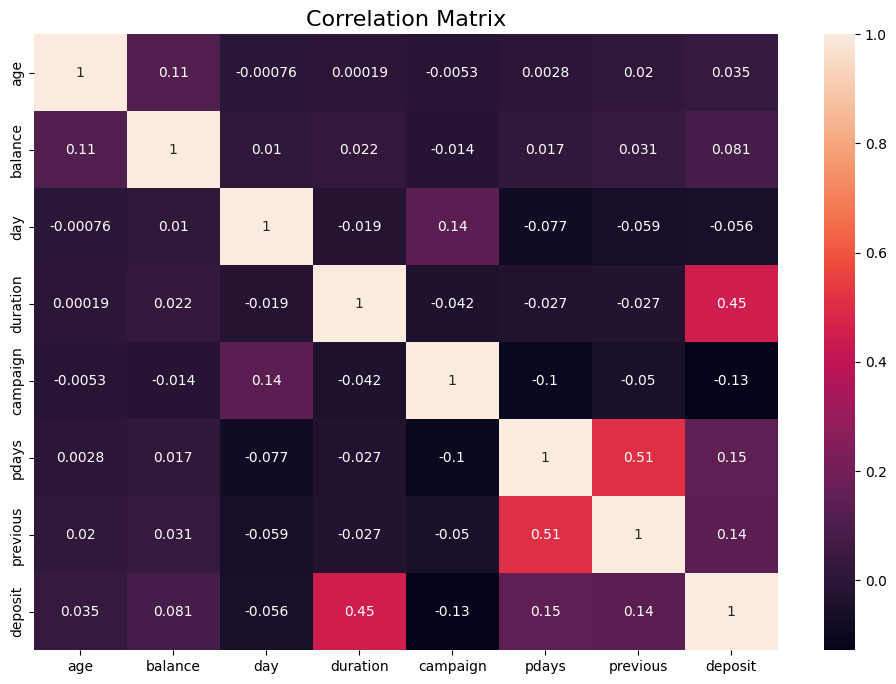

In [21]:
df2=df.copy()
fig = plt.figure(figsize=(12,8))
df2['deposit'] = LabelEncoder().fit_transform(df2['deposit'])



numeric_df = df2.select_dtypes(exclude="object")

corr= numeric_df.corr()


sns.heatmap(corr, cbar=True,annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# prepare data for modeling

In [22]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


## Separate categorical and numerical columns

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [27]:
df[numerical_columns].head(3)

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


In [28]:
df[categorical_columns].head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes


# convert categorical columns to numerical

Apply label encoding to categorical columns 

In [29]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Apply scaling to numerical columns

In [30]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3,1


# Data spliting 

Split features (data) and target variable

In [31]:
X = df.drop(columns=['deposit'])  
y = df['deposit']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (8929, 16)
train target   shape:  (8929,)
__________

test  features shape:  (2233, 16)
test  target   shape:  (2233,)


# Modeling

## LinearRegression

### training

In [34]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

### Evaluation

In [35]:
y_pred=LR.predict(X_test)
y_pred

array([0.47578849, 0.89877642, 0.64161814, ..., 0.41903778, 0.9028321 ,
       0.49171316])

In [36]:
y_test

5527     0
4541     1
1964     1
5007     1
8928     0
        ..
376      1
5544     0
10749    0
3881     1
6786     0
Name: deposit, Length: 2233, dtype: int32

In [48]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.20      0.17      0.19      1166
     deposit       0.23      0.27      0.25      1067

    accuracy                           0.22      2233
   macro avg       0.22      0.22      0.22      2233
weighted avg       0.22      0.22      0.22      2233



In [47]:
LR.coef_

array([ 0.01005144,  0.00127897,  0.02464056,  0.0363305 , -0.0497507 ,
        0.01635566, -0.17108601, -0.11078905, -0.10842142, -0.0117625 ,
        0.0085283 ,  0.22947051, -0.03703521,  0.06142579,  0.04159872,
        0.02854728])

In [42]:
LR.intercept_

0.423561948779166

save the results

In [43]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision Score','Recall Score','F1-Score','roc_auc'])

### Confusion matrix 

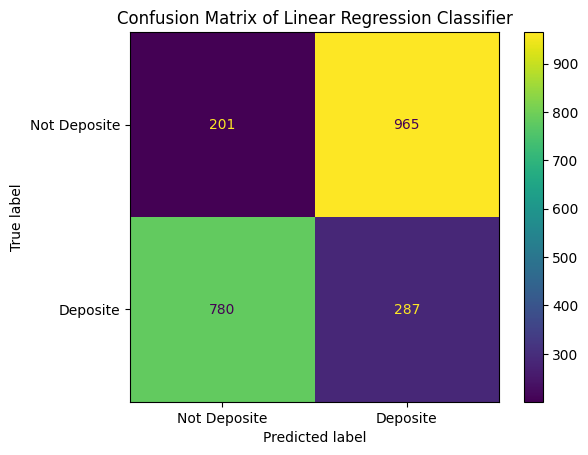

In [44]:
cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Linear Regression Classifier")
plt.show()

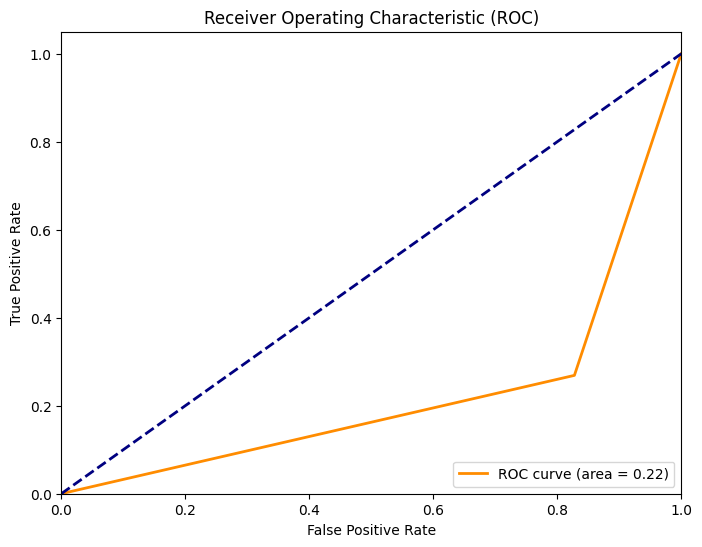

In [49]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [50]:
model_result = ['Linear Regression',accuracy_score(y_test,y_pred), 
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.21854,0.229233,0.268978,0.24752,0.220681


## Random forest classifier

### model training

In [51]:
RF=RandomForestClassifier(n_estimators=10,criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Evaluation

In [52]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [53]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.83      0.83      0.83      1166
     deposit       0.82      0.81      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



### the Confusion matrix 

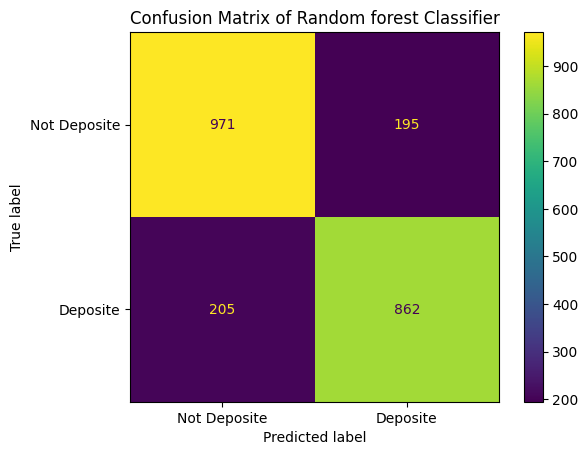

In [54]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Random forest Classifier")
plt.show()

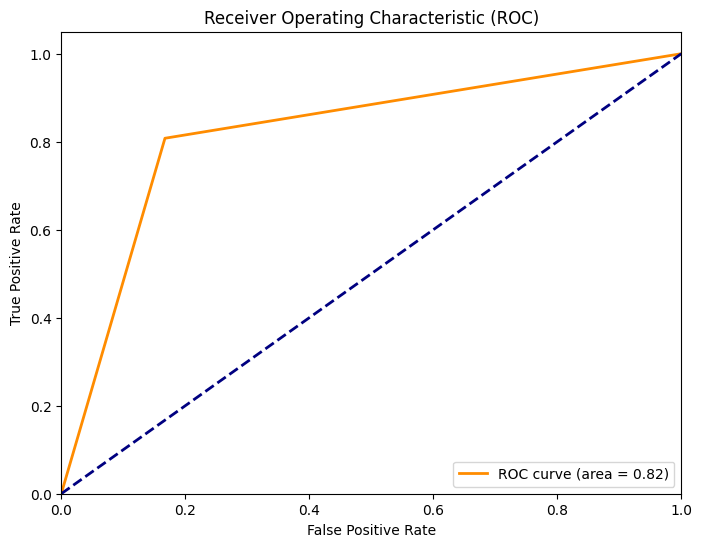

In [55]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### save reults

In [56]:
model_result = ['Random Forest',accuracy_score(y_test,y_pred), 
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.218540,0.229233,0.268978,0.247520,0.220681
1,Random Forest,0.820869,0.815516,0.807873,0.811676,0.820317


## Logistic Regression

### model training

In [57]:
Logistic_regression = LogisticRegression(penalty='l2', dual=False, C=0.9, fit_intercept=True
                        , random_state = 41, max_iter=1000)
Logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.9, max_iter=1000, random_state=41)

### model evaluation

In [58]:
y_pred=Logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [59]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.79      0.82      0.80      1166
     deposit       0.79      0.76      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



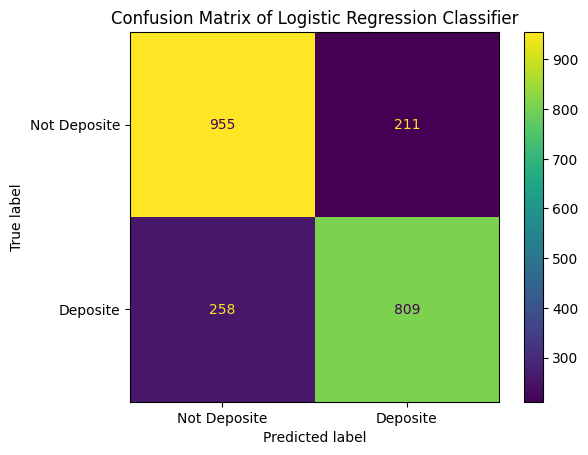

In [60]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

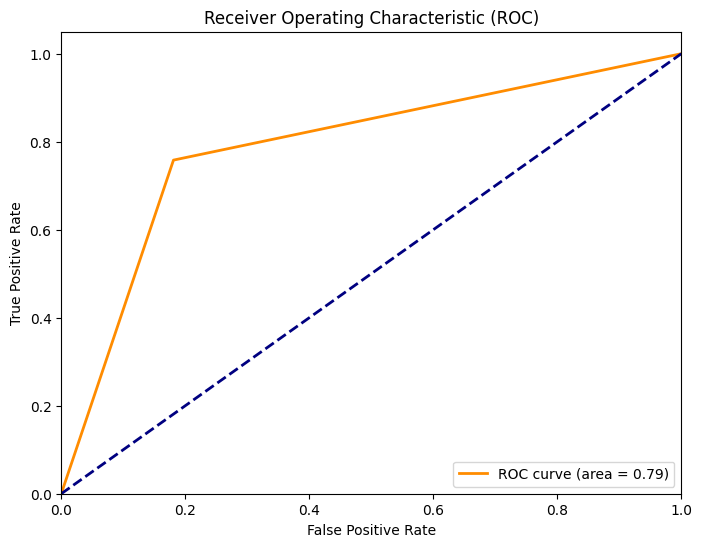

In [61]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

save results

In [62]:
model_result = ['Logistic Regression',accuracy_score(y_test,y_pred), 
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.218540,0.229233,0.268978,0.247520,0.220681
1,Random Forest,0.820869,0.815516,0.807873,0.811676,0.820317
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620


## Linear Support-Vector Classifier

### mosel training

In [63]:
LSVC = LinearSVC(penalty='l2',dual=False, C=.9)
LSVC.fit(X_train,y_train)

LinearSVC(C=0.9, dual=False)

### Model Evaluation

In [64]:
y_pred=LSVC.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [65]:
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.78      0.82      0.80      1166
     deposit       0.79      0.75      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.78      0.78      2233
weighted avg       0.79      0.79      0.79      2233



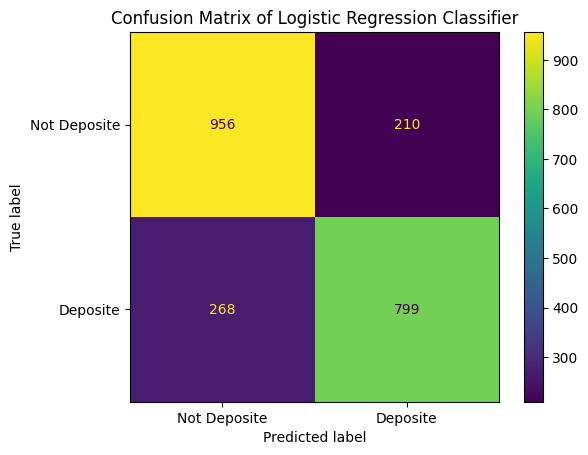

In [66]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of Logistic Regression Classifier")
plt.show()

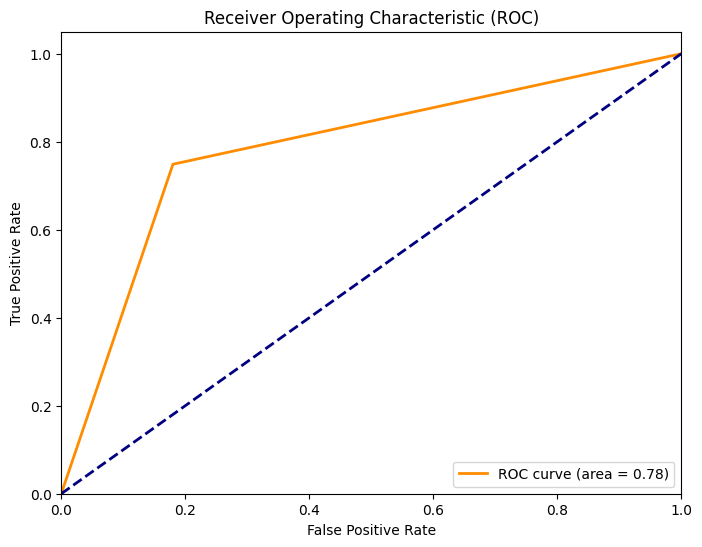

In [67]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [68]:
model_result = ['Linear SVC',accuracy_score(y_test,y_pred), 
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.218540,0.229233,0.268978,0.247520,0.220681
1,Random Forest,0.820869,0.815516,0.807873,0.811676,0.820317
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363


## CNN

### convert data to images 
cnn mainly work with images, so we convert our numerical data image shape

In [69]:
#Normalize Data
X_normalized = (df - df.min()) / (df.max() - df.min())

X_array = X_normalized.values

N_samples, N_features = X_array.shape
height = 1 
width = N_features  
channels = 1  
X_reshaped = X_array.reshape(N_samples, height, width, channels)


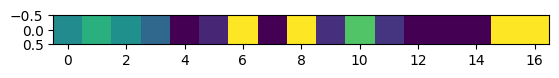

In [70]:
img=X_reshaped[3]
plt.imshow(img)
plt.show()

### split data


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [72]:
print('train features shape: ',X_train.shape)
print('train target   shape: ',y_train.shape)
print('__________\n')
print('valid  features shape: ',X_valid.shape)
print('valid  target   shape: ',y_valid.shape)
print('__________\n')
print('test  features shape: ',X_test.shape)
print('test  target   shape: ',y_test.shape)

train features shape:  (7589, 1, 17, 1)
train target   shape:  (7589,)
__________

valid  features shape:  (1340, 1, 17, 1)
valid  target   shape:  (1340,)
__________

test  features shape:  (2233, 1, 17, 1)
test  target   shape:  (2233,)


In [73]:
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(height, width, channels), padding='same'),
    MaxPooling2D((1, 2)),
    Flatten(),
    Dense(6, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid') 
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 17, 2)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 8, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5313 - loss: 0.6880 - val_accuracy: 0.6664 - val_loss: 0.6489
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.6382 - val_accuracy: 0.7597 - val_loss: 0.5605
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7465 - loss: 0.5327 - val_accuracy: 0.8187 - val_loss: 0.3944
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8449 - loss: 0.3759 - val_accuracy: 0.9604 - val_loss: 0.2176
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9412 - loss: 0.2242 - val_accuracy: 0.9716 - val_loss: 0.1327
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1608 - val_accuracy: 0.9761 - val_loss: 0.0982
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.1248 - val_accuracy: 0.9724 - val_loss: 0.0818
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1082 - val_accuracy: 0.

### Evaluate Model

In [75]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.9829 - loss: 0.0699
Test Accuracy: 0.9789521098136902


In [76]:
y_pred=model.predict(X_test)
print(y_pred.shape)
y_pred[:5]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(2233, 1)


array([[0.10403127],
       [0.99829155],
       [0.8576525 ],
       [0.99841785],
       [0.00495655]], dtype=float32)

In [77]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test,y_pred,target_names=['not deposit','deposit']))

              precision    recall  f1-score   support

 not deposit       0.97      0.99      0.98      1166
     deposit       0.99      0.97      0.98      1067

    accuracy                           0.98      2233
   macro avg       0.98      0.98      0.98      2233
weighted avg       0.98      0.98      0.98      2233



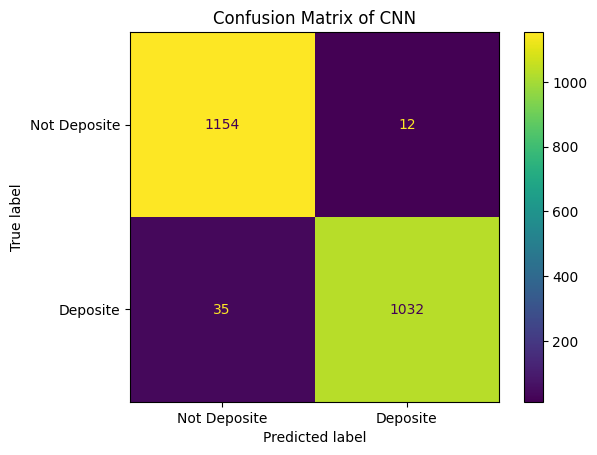

In [78]:

cm_matrix = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_matrix, display_labels = ['Not Deposite','Deposite'])
cm_display.plot()
plt.title("Confusion Matrix of CNN")
plt.show()

## 

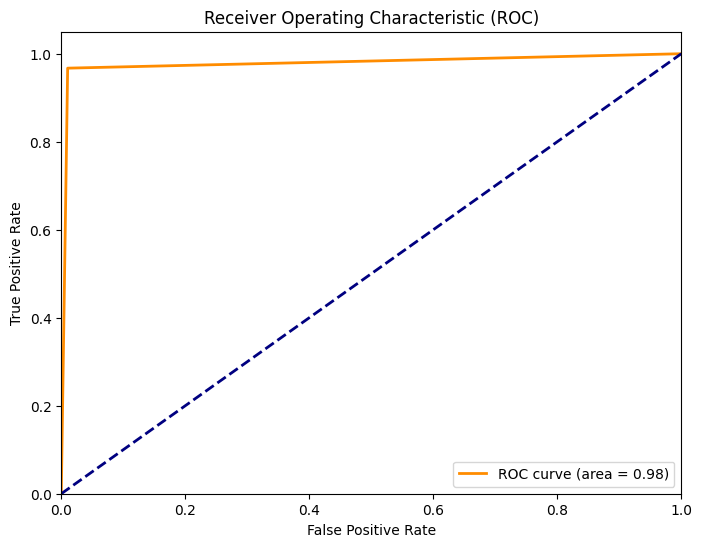

In [79]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [80]:
model_result = ['CNN',accuracy_score(y_test,y_pred), 
              precision_score(y_test,y_pred), recall_score(y_test,y_pred),
              f1_score(y_test,y_pred),roc_auc]
results = results.drop(results[results['Model Name'] == 'CNN'].index, errors='ignore')
results.loc[len(results)]=model_result
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.218540,0.229233,0.268978,0.247520,0.220681
1,Random Forest,0.820869,0.815516,0.807873,0.811676,0.820317
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,0.978952,0.988506,0.967198,0.977736,0.978453


In [81]:
model.save('cnn_model.h5')

# Evaluation and comaprison

In [82]:
results

,Model Name,Accuracy,Precision Score,Recall Score,F1-Score,roc_auc
0,Linear Regression,0.218540,0.229233,0.268978,0.247520,0.220681
1,Random Forest,0.820869,0.815516,0.807873,0.811676,0.820317
2,Logistic Regression,0.789969,0.793137,0.758201,0.775276,0.788620
3,Linear SVC,0.785938,0.791873,0.748828,0.769750,0.784363
4,CNN,0.978952,0.988506,0.967198,0.977736,0.978453


### Accuracy Comparison

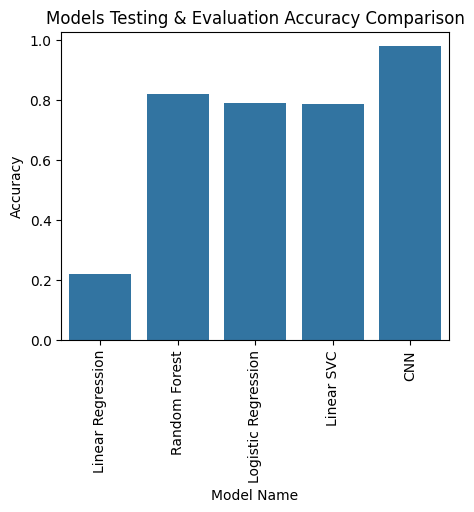

In [83]:
import seaborn as sns
plt.subplots(figsize=(5,4))
sns.barplot(x="Model Name", y="Accuracy",data=results)
plt.xticks(rotation=90)
plt.title('Models Testing & Evaluation Accuracy Comparison')
plt.show()